In [1]:
# importing libraries
import pandas as pd

In [2]:
df = pd.read_csv("Absenteeism_data.csv")

In [3]:
# Removing the id column
df_new = df.iloc[:,1:]

In [4]:
# Grouping the variables into a different columns
df_new['Group 1'] = df_new['Reason for Absence'].apply(lambda x: 1 if x in [x for x in range(1,15)] else 0)
df_new['Group 2'] = df_new['Reason for Absence'].apply(lambda x: 1 if x in [x for x in range(15,18)] else 0)
df_new['Group 3'] = df_new['Reason for Absence'].apply(lambda x: 1 if x in [x for x in range(18,22)] else 0)
df_new['Group 4'] = df_new['Reason for Absence'].apply(lambda x: 1 if x in [x for x in range(22,29)] else 0)

In [5]:
df_new.drop(['Reason for Absence'],axis='columns', inplace=True)

In [27]:
df_new.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Group 1,Group 2,Group 3,Group 4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
Group 1                      700 non-null int64
Group 2                      700 non-null int64
Group 3                      700 non-null int64
Group 4                      700 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 76.7+ KB


In [8]:
df_new['Daily Work Load Average'].min(),df_new['Daily Work Load Average'].max()

(205.917, 378.884)

In [9]:
df_new_noage = df_new.copy()

In [10]:
df_new_noage.drop(['Age'],axis=1,inplace=True)

In [11]:
new_age_set = pd.get_dummies(df_new['Age'])

In [12]:
new_age_set['check']=new_age_set.sum(axis='columns')

In [13]:
new_age_set.check.min(), new_age_set.check.max()

(1, 1)

In [14]:
new_age_set.drop(['check'],axis='columns',inplace=True)

In [35]:
df_concatenated  = pd.concat([df_new_noage,new_age_set], axis=1)

In [37]:
df_concatenated.head()

,Date,Transportation Expense,Distance to Work,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Group 1,...,39,40,41,43,46,47,48,49,50,58
0,07/07/2015,289,36,239.554,30,1,2,1,4,0,...,0,0,0,0,0,0,0,0,0,0
1,14/07/2015,118,13,239.554,31,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,15/07/2015,179,51,239.554,31,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,16/07/2015,279,5,239.554,24,1,2,0,4,1,...,1,0,0,0,0,0,0,0,0,0
4,23/07/2015,289,36,239.554,30,1,2,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_concatenated.columns

Index([                     'Date',    'Transportation Expense',
                'Distance to Work',   'Daily Work Load Average',
                 'Body Mass Index',                 'Education',
                        'Children',                      'Pets',
       'Absenteeism Time in Hours',                   'Group 1',
                         'Group 2',                   'Group 3',
                         'Group 4',                          27,
                                28,                          29,
                                30,                          31,
                                32,                          33,
                                34,                          36,
                                37,                          38,
                                39,                          40,
                                41,                          43,
                                46,                          47,
                         

In [40]:
clmn_nms = ['Date',    'Transportation Expense',
                'Distance to Work',   'Daily Work Load Average',
                 'Body Mass Index',                 'Education',
                        'Children',                      'Pets',
                          'Group 1',
                         'Group 2',                   'Group 3',
                         'Group 4',                          27,
                                28,                          29,
                                30,                          31,
                                32,                          33,
                                34,                          36,
                                37,                          38,
                                39,                          40,
                                41,                          43,
                                46,                          47,
                                48,                          49,
                                50,                          58,'Absenteeism Time in Hours']

In [42]:
df_concatenated = df_concatenated[clmn_nms]

In [43]:
df_concatenated

,Date,Transportation Expense,Distance to Work,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Group 1,Group 2,...,40,41,43,46,47,48,49,50,58,Absenteeism Time in Hours
0,07/07/2015,289,36,239.554,30,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,4
1,14/07/2015,118,13,239.554,31,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15/07/2015,179,51,239.554,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,16/07/2015,279,5,239.554,24,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,4
4,23/07/2015,289,36,239.554,30,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,237.656,22,2,2,0,1,0,...,1,0,0,0,0,0,0,0,0,8
696,23/05/2018,225,26,237.656,24,1,1,2,1,0,...,0,0,0,0,0,0,0,0,0,3
697,24/05/2018,330,16,237.656,25,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8
698,24/05/2018,235,16,237.656,25,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


# Creating a check point

In [47]:
df_reason_mod = df_concatenated.copy()

In [50]:
type(df_reason_mod['Date'][0])

str

In [52]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'],format='%d/%m/%Y')

In [69]:
df_reason_mod['Month Value']=df_reason_mod.Date.apply(lambda x: x.month)
df_reason_mod['Day of the Week']=df_reason_mod.Date.apply(lambda x: x.weekday())

In [68]:
df_reason_mod.Date[0].weekday()

1

In [70]:
df_reason_mod.head(3)

,Date,Transportation Expense,Distance to Work,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Group 1,Group 2,...,43,46,47,48,49,50,58,Absenteeism Time in Hours,Month Value,Day of the Week
0,2015-07-07,289,36,239.554,30,1,2,1,0,0,...,0,0,0,0,0,0,0,4,7,1
1,2015-07-14,118,13,239.554,31,1,1,0,0,0,...,0,0,0,0,0,1,0,0,7,1
2,2015-07-15,179,51,239.554,31,1,0,0,0,0,...,0,0,0,0,0,0,0,2,7,2


In [64]:
df_reason_mod.shape[0]

700

In [71]:
df_reason_date_mod = df_reason_mod.copy()

In [78]:
df_reason_date_mod.Education.unique()

array([0, 1], dtype=int64)

In [75]:
df_reason_date_mod.Education.value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [77]:
df_reason_date_mod.Education = df_reason_date_mod.Education.map({1:0,2:1,3:1,4:1})

In [79]:
df_reason_date_mod.Education.value_counts()

0    583
1    117
Name: Education, dtype: int64

In [80]:
df_preprocessed = df_reason_date_mod.copy()

### Writing into a csv file for further processing

In [84]:
df_preprocessed.to_csv('Absenteeism_preprocessed.csv', index=False)

In [83]:
df_preprocessed.head()

,Date,Transportation Expense,Distance to Work,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Group 1,Group 2,...,43,46,47,48,49,50,58,Absenteeism Time in Hours,Month Value,Day of the Week
0,2015-07-07,289,36,239.554,30,0,2,1,0,0,...,0,0,0,0,0,0,0,4,7,1
1,2015-07-14,118,13,239.554,31,0,1,0,0,0,...,0,0,0,0,0,1,0,0,7,1
2,2015-07-15,179,51,239.554,31,0,0,0,0,0,...,0,0,0,0,0,0,0,2,7,2
3,2015-07-16,279,5,239.554,24,0,2,0,1,0,...,0,0,0,0,0,0,0,4,7,3
4,2015-07-23,289,36,239.554,30,0,2,1,0,0,...,0,0,0,0,0,0,0,2,7,3


In [38]:
df.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

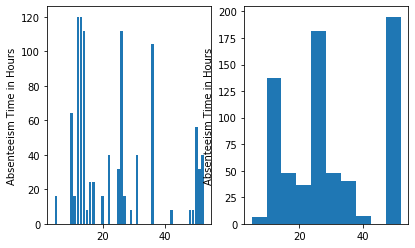

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.bar(df_new_noage['Distance to Work'],df_new_noage['Absenteeism Time in Hours'])
plt.ylabel('Absenteeism Time in Hours')

plt.subplot(132)
plt.hist(df_new_noage['Distance to Work'])
plt.ylabel('Absenteeism Time in Hours')


plt.show()

In [34]:
range(0,df_new_noage['Distance to Work'].index.max())

range(0, 699)

In [41]:
df_new_noage['test'] = 1